In [7]:
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
with open("../data/processed/ant_behavioral_train_test.pkl", "rb") as f:
    data = pickle.load(f)

X_train, X_test, y_train, y_test = data["X_train"], data["X_test"], data["y_train"], data["y_test"]

In [4]:
# Initialize and fit the model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Predictions
y_pred_train = linreg.predict(X_train)
y_pred_test = linreg.predict(X_test)

# Evaluate performance
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f"Train R²: {r2_train:.3f}, RMSE: {rmse_train:.3f}")
print(f"Test  R²: {r2_test:.3f}, RMSE: {rmse_test:.3f}")

Train R²: 0.187, RMSE: 0.898
Test  R²: 0.191, RMSE: 0.906


In [6]:
coef_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": linreg.coef_
}).sort_values(by="Coefficient", ascending=False)

display(coef_df.head(10))   # top positive = slower RT
display(coef_df.tail(10))   # most negative = faster RT

,Feature,Coefficient
0,trial_type_Incongruent,0.660608
1,prev_trial_type_NoCue,0.227422
7,run_3,0.004117
6,run_2,-0.030495
9,run_5,-0.032569
10,run_6,-0.038879
4,target_pos_Up,-0.050238
8,run_4,-0.051287
3,target_dir_Right,-0.092882
5,session_ses-2,-0.111936


,Feature,Coefficient
1,prev_trial_type_NoCue,0.227422
7,run_3,0.004117
6,run_2,-0.030495
9,run_5,-0.032569
10,run_6,-0.038879
4,target_pos_Up,-0.050238
8,run_4,-0.051287
3,target_dir_Right,-0.092882
5,session_ses-2,-0.111936
2,prev_trial_type_SpatialCue,-0.421373


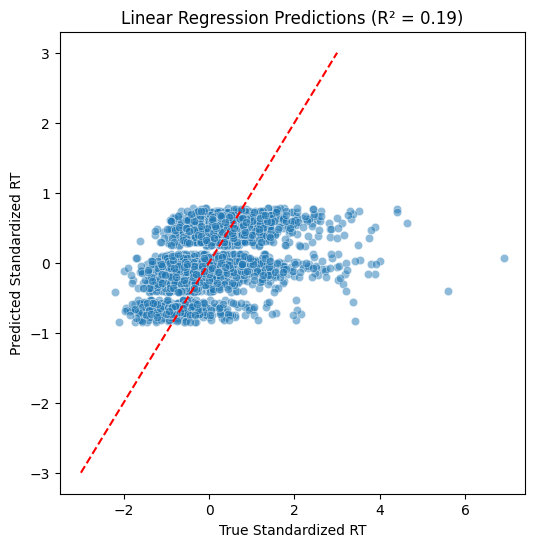

In [8]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.5)
plt.xlabel("True Standardized RT")
plt.ylabel("Predicted Standardized RT")
plt.title(f"Linear Regression Predictions (R² = {r2_test:.2f})")
plt.plot([-3,3], [-3,3], "r--")
plt.show()

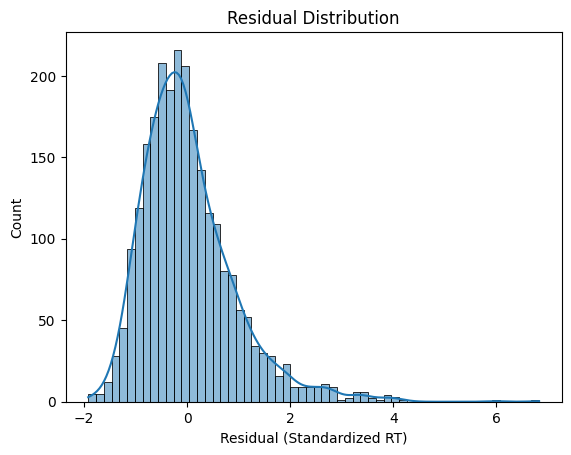

In [9]:
residuals = y_test - y_pred_test
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.xlabel("Residual (Standardized RT)")
plt.show()
